In [17]:
# plot the results of linear PCMCI

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn
import tigramite
from tigramite import data_processing
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr
import pickle
from IPython.display import clear_output
from tigramite import plotting as tp
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
def sort_df(df):
    return df.sort_index()

## Analysis of PCMCI results

In [36]:
#Get the linear PCMCI results for personal exposure PM2.5
df_20h = pd.read_csv("results/p/linear_p_20h.csv", header = 0, index_col="trial")
df_20h

,1,2,3,4,5,6,7,8,9,10,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200
trial,,,,,,,,,,,,,,,,,,,,,
DAP017(1).csv,0.733657,0.709656,0.928677,0.007943,0.028710,0.862887,0.596985,0.448428,0.028693,0.037383,...,0.566237,0.181403,0.335306,0.196635,0.390120,0.611267,0.853712,0.042270,0.574881,0.982108
DAP050(1).csv,0.575035,0.548526,0.714771,0.856557,0.573746,0.958263,0.832676,0.881724,0.076398,0.225310,...,0.467822,0.771778,0.525836,0.059741,0.195807,0.432791,0.223210,0.778081,0.047115,0.315351
DAP021(1).csv,0.262509,0.102336,0.371383,0.813319,0.474672,0.437707,0.191711,0.144571,0.439501,0.191209,...,0.427001,0.369586,0.169761,0.674915,0.079916,0.912396,0.858162,0.554363,0.371674,0.055885
DAP042(1).csv,0.171818,0.278293,0.416174,0.535330,0.863857,0.370221,0.457194,0.629627,0.034140,0.395882,...,0.051734,0.929953,0.544272,0.605399,0.597768,0.599895,0.239915,0.036028,0.093430,0.473473
DAP019(1).csv,0.040432,0.125552,0.155729,0.293591,0.938324,0.137139,0.078005,0.050360,0.389943,0.444237,...,0.357234,0.817970,0.273271,0.821001,0.113425,0.891969,0.448767,0.445608,0.535280,0.091084
DAP007(1).csv,0.235003,0.531629,0.225741,0.623672,0.647936,0.461112,0.391098,0.795864,0.636676,0.825543,...,0.239957,0.574056,0.241901,0.113904,0.775281,0.472906,0.709482,0.110878,0.037451,0.284540
DAP044(1).csv,0.545890,0.368630,0.975759,0.578421,0.465575,0.865521,0.115242,0.912699,0.616997,0.418983,...,0.968525,0.535756,0.097586,0.787950,0.166798,0.657300,0.430136,0.986903,0.503226,0.435151
DAP014(2).csv,0.514512,0.131189,0.717264,0.670950,0.570334,0.862439,0.965151,0.810146,0.325935,0.358569,...,0.959350,0.517697,0.528551,0.365439,0.829320,0.225383,0.443299,0.699568,0.867532,0.026661
DAP025(1).csv,0.934920,0.128048,0.346590,0.754567,0.596927,0.677158,0.677097,0.302427,0.903708,0.976404,...,0.837822,0.522362,0.092623,0.469391,0.830344,0.177453,0.647536,0.060412,0.532108,0.521233


In [45]:
temp = df_20h.iloc[10]

In [46]:
df_20h.index[10][:9]

'DAP013(1)'

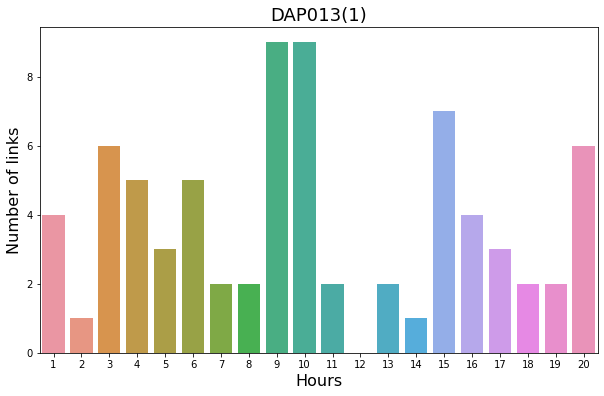

In [47]:
links_h_plus = []
x = [j for j in range(1,21)]
fig, ax = plt.subplots(figsize = (10,6))
for j in range(20):
    links_h_plus.append(len(np.argwhere(temp[(60*j):60*(j+1)].values <= 0.05)))

sns.barplot(x = x, y = np.array(links_h_plus))

ax.set_title(df_20h.index[10][:9], fontsize = 18)

#plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("Hours", fontsize = 16)
plt.ylabel("Number of links", fontsize = 16)
plt.savefig(f"results/plot/{df_20h.index[10][:9]}.pdf")

In [16]:
#Get the number of links per time lag
links = []
for i in range(1, 1201):
    links.append(len(np.argwhere(df_20h[str(i)].values <= 0.05)))
#Total number of causal links
np.sum(np.array(links))

1798

In [17]:
#Average number of links per trial
avg_links = np.sum(np.array(links))/len(df_20h)
avg_links

66.5925925925926

In [18]:
#Proportion of links per lags
avg_links / 1200

0.05549382716049383

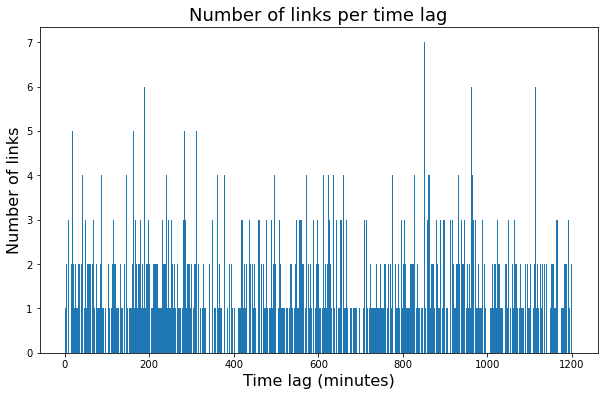

In [20]:
plt.subplots(figsize = (10,6))
plt.bar(range(1,1201), links, width=1)
plt.title("Number of links per time lag", fontsize = 18)
plt.xlabel("Time lag (minutes)", fontsize = 16)
plt.ylabel("Number of links", fontsize = 16)
plt.savefig("results/plot/num_links_time_lag.pdf")

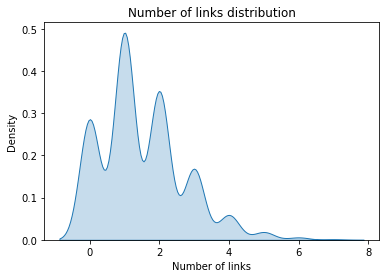

In [21]:
#Get the distribution of the number of links
ax = sns.kdeplot(links, shade=True)
ax.set_title("Number of links distribution")
ax.set_ylabel("Density")
ax.set_xlabel("Number of links")
plt.savefig("results/plot/num_links_distribution.pdf")

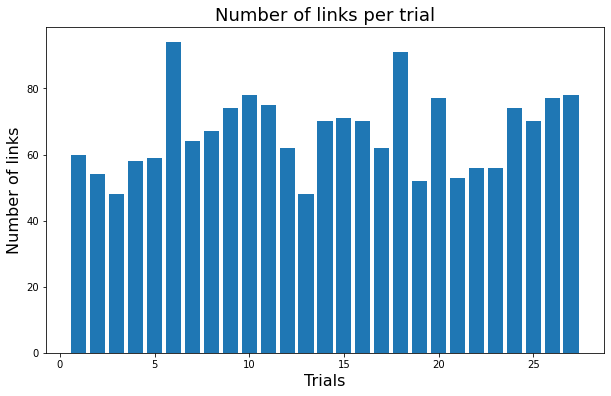

In [24]:
#Get the number of links per trial
links = []
for i in range(len(df_20h)):
    links.append(len(np.argwhere(df_20h.iloc[i,:].values <= 0.05)))
    
plt.subplots(figsize = (10,6))
plt.bar(range(1,len(df_20h)+1), links)
plt.title("Number of links per trial", fontsize = 18)
plt.xlabel("Trials", fontsize = 16)
plt.ylabel("Number of links", fontsize = 16)
plt.savefig("results/plot/num_links_trial.pdf")

In [25]:
min(links)

48

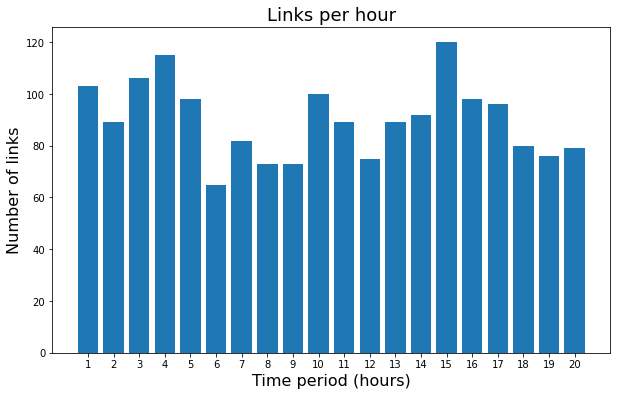

In [48]:
#Get the number of links found per hour
links_per_hour = []
for j in range(20):
    links_h = []
    for i in range(len(df_20h)):
        links_h.append(len(np.argwhere(df_20h.iloc[i,(60*j):60*(j+1)].values <= 0.05)))
    links_per_hour.append(np.sum(np.array(links_h)))

plt.subplots(figsize = (10,6))
plt.bar(range(1,21), links_per_hour)
plt.title("Links per hour", fontsize = 18)
plt.ylabel("Number of links", fontsize = 16)
plt.xlabel("Time period (hours)", fontsize = 16)
plt.xticks(range(1,21))
plt.savefig("results/plot/num_links_hour.pdf")

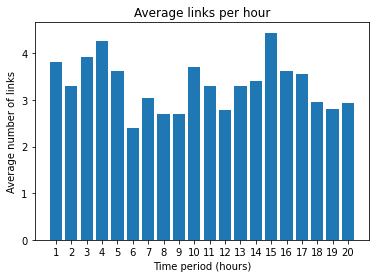

In [49]:
avg_links_per_hour = np.array(links_per_hour)/len(df_20h)
plt.bar(range(1,21), avg_links_per_hour)
plt.title("Average links per hour")
plt.ylabel("Average number of links")
plt.xlabel("Time period (hours)")
plt.xticks(range(1,21))
plt.savefig("results/plot/avg_num_links_hour.pdf")

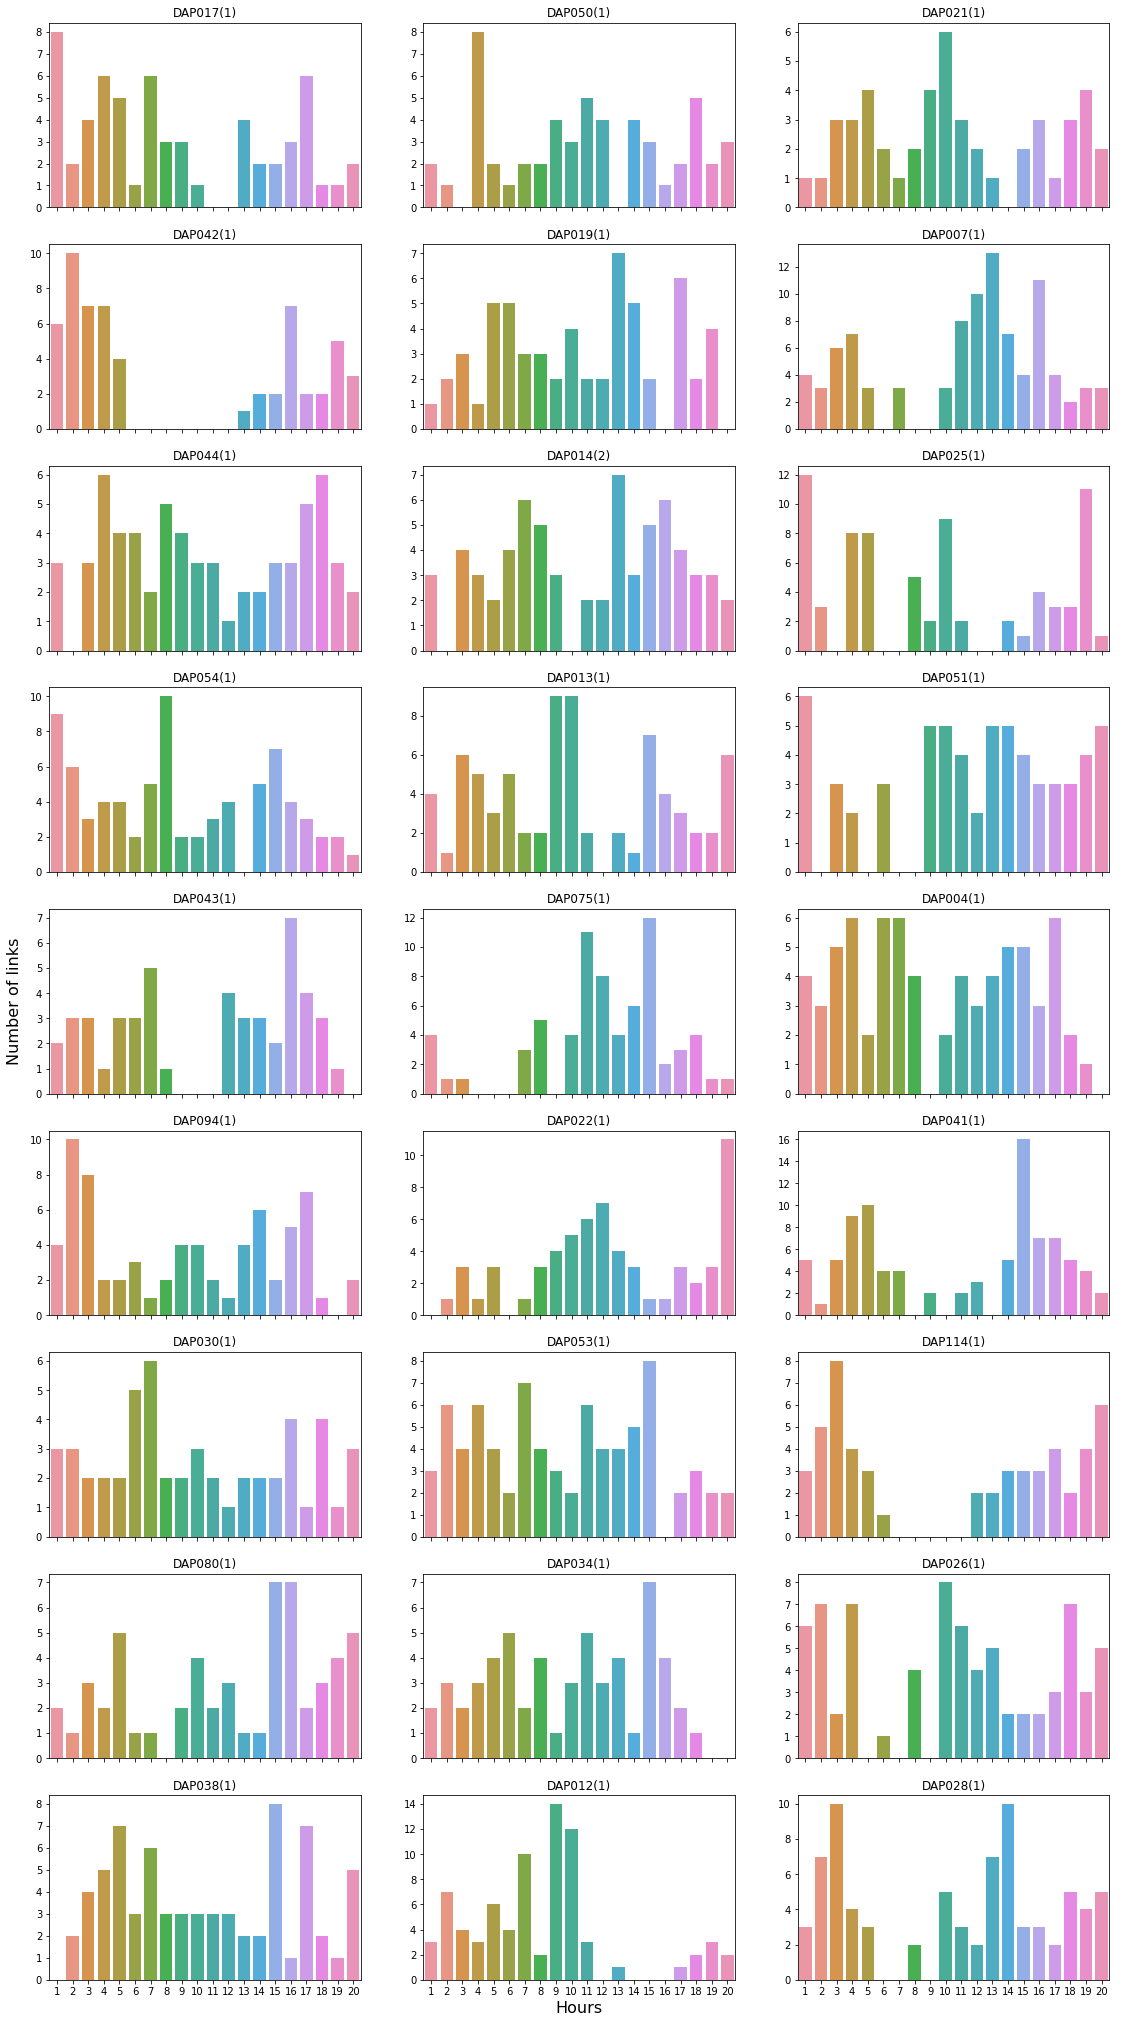

In [50]:
#Plot the distribution of links for each trial
fig, axs = plt.subplots(9, 3, sharex=True, figsize=(19,36))

x = [j for j in range(1,21)]

for i in range(len(df_20h)):

    links_h = []
    for j in range(20):
        links_h.append(len(np.argwhere(df_20h.iloc[i,(60*j):60*(j+1)].values <= 0.05)))

    sns.barplot(x = x, y = np.array(links_h), ax = axs[int(i/3),i%3])
    axs[int(i/3),i%3].set_ylabel("")
    axs[int(i/3),i%3].set_title("{}".format(df_20h.index[i][:9]))

#fig.delaxes(axs[int((len(df_20h))/3),(len(df_20h))%3])
#fig.delaxes(axs[int((len(df_20h))/3),(len(df_20h))%3+1])

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("Hours", fontsize = 16)
plt.ylabel("Number of links", fontsize = 16)
plt.savefig("results/plot/links_distribution_linear_per_trial.pdf")

In [4]:
## heatmap

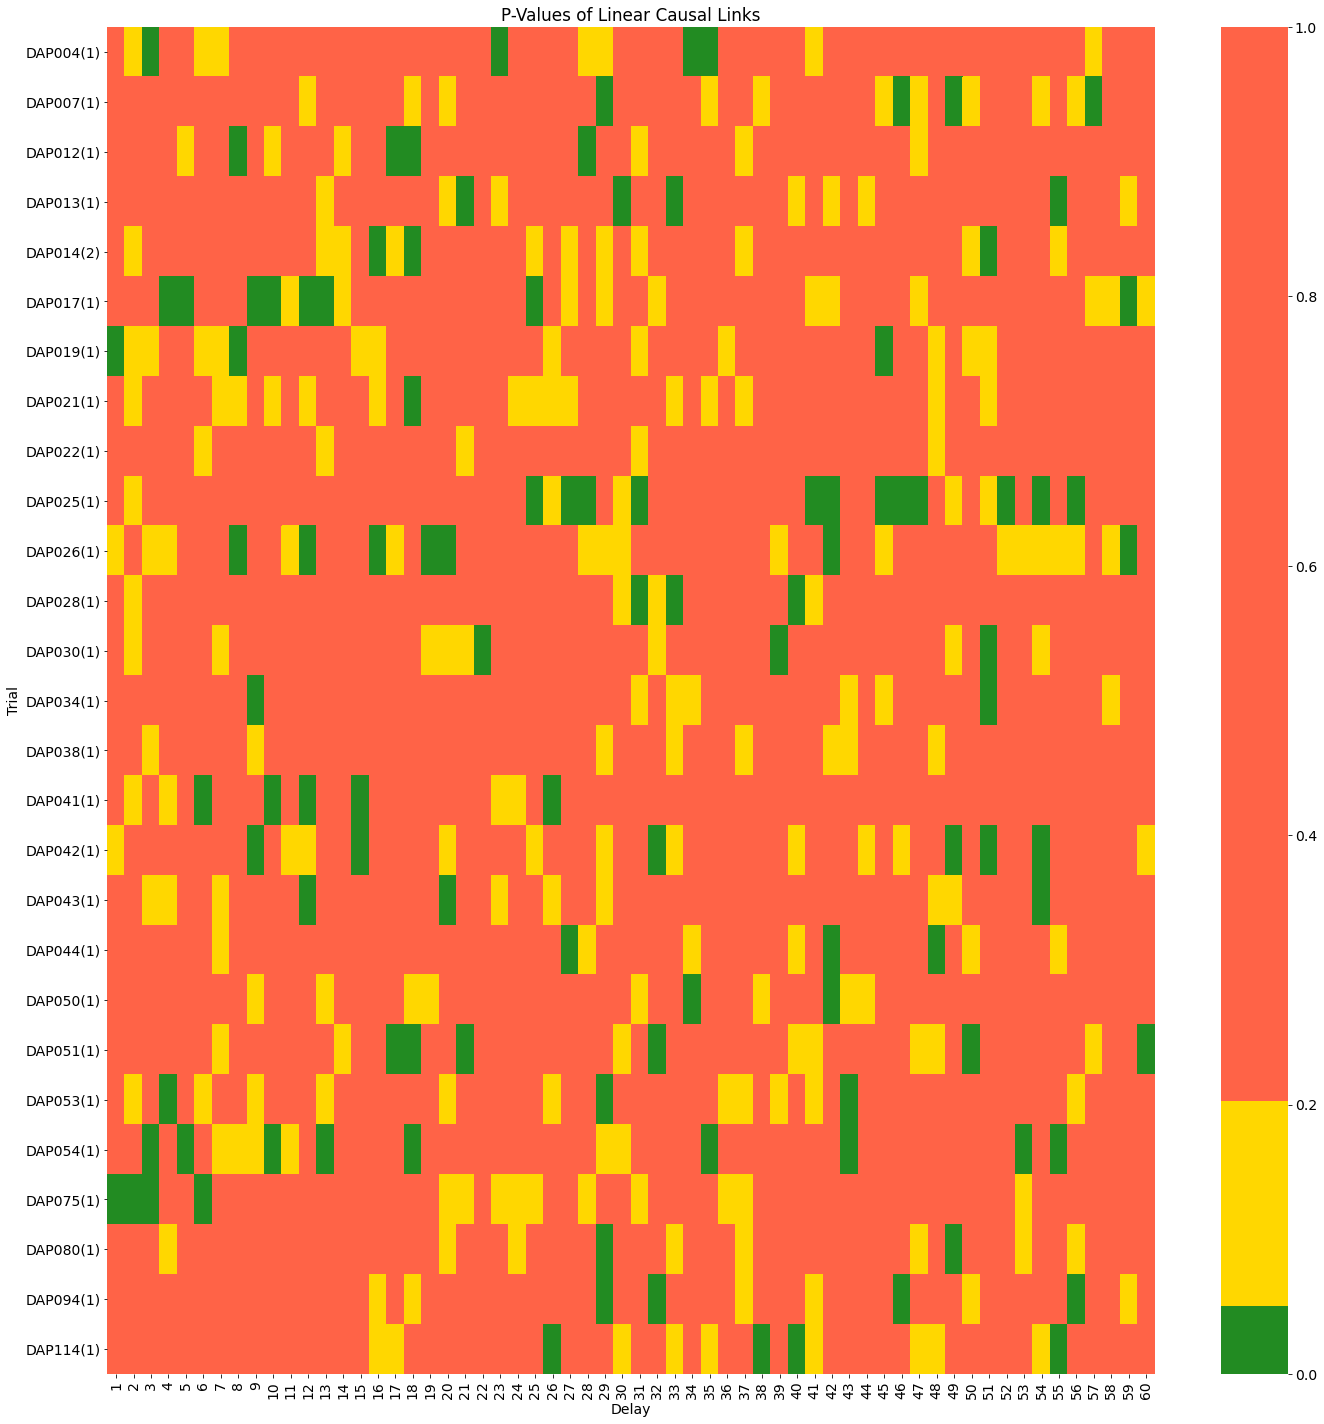

In [16]:
from matplotlib.colors import colorConverter, ListedColormap
from matplotlib import cm

viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
green = np.array(colorConverter.to_rgba("forestgreen"))
yellow = np.array(colorConverter.to_rgba("gold"))
red = np.array(colorConverter.to_rgba("tomato"))
newcolors[:13, :] = green
newcolors[13:52, :] = yellow
newcolors[52:, :] = red
newcmp = ListedColormap(newcolors)

matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
matplotlib.rcParams.update({'font.size': 14})

df = pd.read_csv("results/p/linear_p_20h.csv", header = 0)
#df = pd.read_csv("linear/linear_p.csv")
for i in range(df.shape[0]):
    df.loc[i,'trial'] = df.loc[i,'trial'][:-4]
df = sort_df(df.set_index("trial")).iloc[:,:60]
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1)
ax = sns.heatmap(df, vmin=0, vmax=1, cmap=newcmp)
ax.set_ylabel("Trial")
ax.set_xlabel("Delay")
ax.set_title("P-Values of Linear Causal Links")
#ax.set_xticks([x for x in range(1, 61)])
plt.tight_layout()
plt.savefig("linear_results.png", dpi=300)
plt.show()